In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

rcParams.update({'font.family':'Arial','font.size':10})

df = pd.read_csv("selected_imputed_genes_tfs.txt",sep="\t",index_col=0)
df = df.T
df_log_normed = np.log2(df+1)

In [2]:
df_meta = pd.read_csv("metadata.txt",sep="\t",index_col=0).to_dict('index')
tfs_annot = pd.read_csv("tf_annotation.txt",sep="\t",index_col=0).to_dict('index')
for i in df_meta:
    df_meta[i] = df_meta[i]["subtype"]
cells = [i.split("_")[0] for i in list(df.T.index)]
df = df.T
df_log_normed = df_log_normed.T
df["cellline"] = cells
df_log_normed["cellline"] = cells

In [3]:
d_tf_to_gene = {}
for x1  in tfs_annot:
    d_tf_to_gene[tfs_annot[x1]['tfs']] = x1

In [4]:
df_genes = {}
with open("signatures_geneids.txt") as f:
    for line in f:
        a = line[:-1].split("\t")
        print(a[0])
        df_genes[a[0]] = a[2:]
        df_temp = df[a[2:]]
        df_temp = df_temp.apply(zscore)
        df[a[0]] = df_temp.mean(axis=1)

Epithelial_cell_line_signature
Mesenchymal_cell_line_signature
Epithelial_tumour_signature
Mesenchymal_tumour_signature
basal_breast_cancer
luminal_breast_cancer
pEMT
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_GLYCOLYSIS
FAO
tfs
il1r1


KeyError: "None of [Index(['ENSG00000115594', 'ENSG00000164362', 'ENSG00000270141',\n       'ENSG0000011500'],\n      dtype='object')] are in the [columns]"

In [5]:
df_genes = {}
with open("signatures_geneids.txt") as f:
    for line in f:
        a = line[:-1].split("\t")
        print(a[0])
        if a[0] == 'il1r1':
            break
        df_genes[a[0]] = a[2:]
        df_temp = df_log_normed[a[2:]]
        df_temp = df_temp.apply(zscore)
        df_log_normed[a[0]] = df_temp.mean(axis=1)

Epithelial_cell_line_signature
Mesenchymal_cell_line_signature
Epithelial_tumour_signature
Mesenchymal_tumour_signature
basal_breast_cancer
luminal_breast_cancer
pEMT
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_GLYCOLYSIS
FAO
tfs
il1r1


In [6]:
df_lum_tfs = {}
df_bas_tfs = {}
df_epi_tfs = {}
df_mes_tfs = {}

for i in df_genes["tfs"]:
    x,y = ss.spearmanr(df["luminal_breast_cancer"],df[i])
    if x > 0.5:
        df_lum_tfs[i] = x
        print("lum",tfs_annot[i]['tfs'],i,x)
    x,y = ss.spearmanr(df["basal_breast_cancer"],df[i])
    if x > 0.5:
        df_bas_tfs[i] = x
        print("bas",tfs_annot[i]['tfs'],i,x)
    x,y = ss.spearmanr(df["Epithelial_cell_line_signature"],df[i])
    if x > 0.5:
        df_epi_tfs[i] = x
        print("epi",tfs_annot[i]['tfs'],i,x)
    x,y = ss.spearmanr(df["Mesenchymal_cell_line_signature"],df[i])
    if x > 0.5:
        df_mes_tfs[i] = x
        print("mes",tfs_annot[i]['tfs'],i,x)

lum TEAD3 ENSG00000007866 0.5326375205988265
epi TEAD3 ENSG00000007866 0.6294092236802944
bas E2F2 ENSG00000007968 0.596879305110845
mes NFIX ENSG00000008441 0.5500859451980559
bas TBPL1 ENSG00000028839 0.5403808652811929
mes TBPL1 ENSG00000028839 0.54161678024795
epi IKZF2 ENSG00000030419 0.5556632438949515
mes ZZZ3 ENSG00000036549 0.5180352870430087
mes ZNF280C ENSG00000056277 0.6688109912750639
mes YBX3 ENSG00000060138 0.5026417308257168
lum HMG20B ENSG00000064961 0.5533110271852881
epi ZNF76 ENSG00000065029 0.5035245861971757
bas YBX1 ENSG00000065978 0.5311714298514789
mes YBX1 ENSG00000065978 0.7295627579371707
bas MSANTD3 ENSG00000066697 0.5131683036500577
mes MSANTD3 ENSG00000066697 0.7592146657308423
mes MEF2A ENSG00000068305 0.6501801110201897
lum SREBF1 ENSG00000072310 0.6159751732885954
epi SREBF1 ENSG00000072310 0.6428859554875284
lum BAZ2A ENSG00000076108 0.5127062117303671
mes RFX3 ENSG00000080298 0.5715902432299838
mes TCF7 ENSG00000081059 0.5393751610475723
lum GRHL2 EN

In [23]:
labels = [df_meta[i.split("_")[0]] for i in df.index]
dummy = []
for i in labels:
    if i not in dummy:
        dummy.append(i)
print(dummy)


['H', 'TNA', 'TNB', 'LA', 'LB', 'Basal-like']


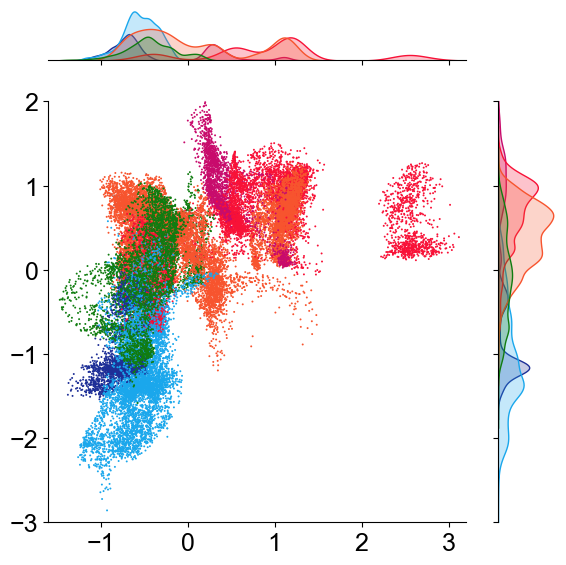

In [28]:
rcParams.update({'font.family':'Arial','font.size':18})
sns.jointplot(x=df["Mesenchymal_tumour_signature"]-df["Epithelial_tumour_signature"], y=df["basal_breast_cancer"]-df["luminal_breast_cancer"],hue=labels,linewidth=0,s=2,palette=['#107C10','#F7542E','#F81137','#1AA7EC','#1E2F97','#C80B6C'])
plt.legend([],frameon=False)
plt.xlim([-1.6,3.2])
plt.ylim([-3,2])
plt.tight_layout()
plt.savefig("subtypes_cell_lines_em_lb.png",dpi=800)

In [7]:
num_consider = 20
lum_tfs = [i[0] for i in sorted(df_lum_tfs.items(), key=lambda x:x[1], reverse=True)[:num_consider]]
bas_tfs = [i[0] for i in sorted(df_bas_tfs.items(), key=lambda x:x[1], reverse=True)[:num_consider]]
epi_tfs = [i[0] for i in sorted(df_epi_tfs.items(), key=lambda x:x[1], reverse=True)[:num_consider]]
mes_tfs = [i[0] for i in sorted(df_mes_tfs.items(), key=lambda x:x[1], reverse=True)[:num_consider]]

In [8]:
len(set(lum_tfs+bas_tfs+epi_tfs+mes_tfs))

65

In [9]:
bas_tfs_old = ['ENSG00000115163','ENSG00000101057','ENSG00000213347','ENSG00000198176','ENSG00000165891','ENSG00000129173','ENSG00000165244','ENSG00000007968','ENSG00000130816','ENSG00000111206','ENSG00000134954','ENSG00000185697','ENSG00000156374','ENSG00000137309','ENSG00000157557']
epi_tfs_old = ['ENSG00000129514','ENSG00000143578','ENSG00000130940','ENSG00000143842','ENSG00000124664','ENSG00000198740','ENSG00000083307','ENSG00000179627','ENSG00000135373','ENSG00000137709','ENSG00000100105','ENSG00000107485','ENSG00000163435','ENSG00000123636','ENSG00000091831']
lum_tfs_old = ['ENSG00000129514','ENSG00000143578','ENSG00000179627','ENSG00000107485','ENSG00000198740','ENSG00000124664','ENSG00000100219','ENSG00000118513','ENSG00000143842','ENSG00000083307','ENSG00000100105','ENSG00000130940','ENSG00000181444','ENSG00000091831','ENSG00000185630']
mes_tfs_old = ['ENSG00000134954','ENSG00000111145','ENSG00000149948','ENSG00000173068','ENSG00000066697','ENSG00000134874','ENSG00000148516','ENSG00000169554','ENSG00000175592','ENSG00000006377','ENSG00000065978','ENSG00000029153','ENSG00000019549','ENSG00000185022','ENSG00000187079']

In [10]:
int_lum_epi = set(epi_tfs).intersection(set(lum_tfs))
int_bas_mes = set(mes_tfs).intersection(set(bas_tfs))
gene_list_no_overlap = []
gene_names = []
color = []
for i in epi_tfs:
    if i in int_lum_epi:
        color.append("green")
        gene_list_no_overlap.append(i)
        gene_names.append(tfs_annot[i]['tfs'])
    else:
        color.append("purple")
        gene_list_no_overlap.append(i)
        gene_names.append(tfs_annot[i]['tfs'])
for i in lum_tfs:
    if i not in int_lum_epi:
        color.append("blue")
        gene_list_no_overlap.append(i)
        gene_names.append(tfs_annot[i]['tfs'])
for i in mes_tfs:
    if i in int_bas_mes:
        color.append("orange")
        gene_list_no_overlap.append(i)
        gene_names.append(tfs_annot[i]['tfs'])
    else:
        color.append("yellow")
        gene_list_no_overlap.append(i)
        gene_names.append(tfs_annot[i]['tfs'])
for i in bas_tfs:
    if i not in int_bas_mes:
        color.append("red")
        gene_list_no_overlap.append(i)
        gene_names.append(tfs_annot[i]['tfs'])

In [11]:
# plot a gene gene correlation matrix of top correlated genes to each of the 4 pathways
x = df[gene_list_no_overlap]
x.columns = gene_names
df_corr = x.corr(method="spearman")

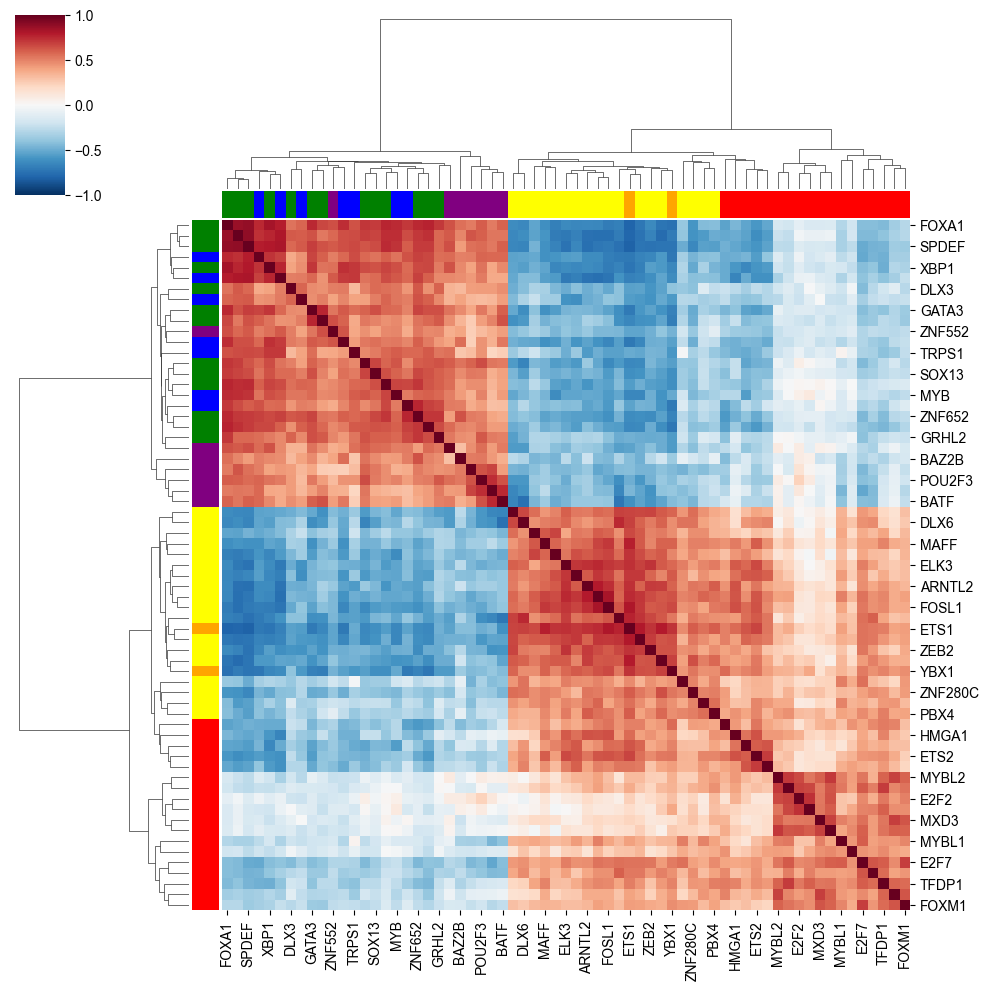

In [12]:
rcParams.update({'font.family':'Arial','font.size':10})
clus_grid_20 = sns.clustermap(df_corr,vmin=-1,vmax=1,row_colors=color,col_colors=color,cmap='RdBu_r')
#plt.savefig("top_20tfs_correlated.png",dpi=1000)

In [100]:
[gene_names[i] for i in clus_grid_20.dendrogram_col.reordered_ind]

['FOXA1',
 'CREB3L4',
 'SPDEF',
 'ZNF467',
 'XBP1',
 'PBX1',
 'DLX3',
 'ASCL2',
 'GATA3',
 'ESR1',
 'ZNF552',
 'CXXC5',
 'TRPS1',
 'CASZ1',
 'SOX13',
 'PATZ1',
 'MYB',
 'BPTF',
 'ZNF652',
 'ZBTB42',
 'GRHL2',
 'SREBF1',
 'BAZ2B',
 'EHF',
 'POU2F3',
 'ELF3',
 'BATF',
 'ZEB1',
 'DLX6',
 'NKX6-1',
 'MAFF',
 'FOXF2',
 'ELK3',
 'SNAI2',
 'ARNTL2',
 'MSANTD3',
 'FOSL1',
 'HMGA2',
 'ETS1',
 'BNC2',
 'ZEB2',
 'DZIP1',
 'YBX1',
 'MEF2A',
 'ZNF280C',
 'TEAD1',
 'PBX4',
 'TBPL1',
 'HMGA1',
 'HOXA3',
 'ETS2',
 'HOXA9',
 'MYBL2',
 'ZNF367',
 'E2F2',
 'DNMT1',
 'MXD3',
 'E2F8',
 'MYBL1',
 'PKNOX1',
 'E2F7',
 'PCGF6',
 'TFDP1',
 'CENPA',
 'FOXM1']

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Mesenchymal_cell_line_signature', ylabel='luminal_breast_cancer'>

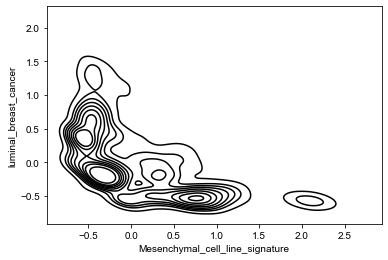

In [30]:
x = df["Mesenchymal_cell_line_signature"]# - df["Epithelial_cell_line_signature"]
y = df["luminal_breast_cancer"]# - df["luminal_breast_cancer"]
sns.kdeplot(x,y,color='black')
#plt.ylim([-2.5,1.75])
#plt.xlim([-2,3.5])

In [24]:
df_new = pd.DataFrame([])
df_new["EMT"] = df["Mesenchymal_cell_line_signature"] - df["Epithelial_cell_line_signature"]
df_new["LBT"] = df["basal_breast_cancer"] - df["luminal_breast_cancer"]
hierarchical_cluster = AgglomerativeClustering(n_clusters=30, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_new)
ep = []
me = []
lu = []
ba = []
for j in np.unique(labels):
    indexes = [ind for ind,val in enumerate(labels)]
    df_subset = df_new.iloc[list(np.where(labels == j))[0]]
    l = list(df_subset.mean())
    ep.append(l[0])
    lu.append(l[1])

In [27]:
with open("./256.txt","w") as f:
    f.write("\t".join(ep)+"\n")
    f.write("\t".join(lu)+"\n")